In [41]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D

In [45]:
# read in file
df1 = pd.read_csv('C:\\Users\\ajens\\OneDrive\\Documents\\Personal\\A.Jensen MDS\\creditcard.csv\\creditcard.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Fraud Detection'

In [46]:
df1.shape

(1000, 31)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# check if there are any missing values in any attributes
NA_val = df1.isna().sum()
print(NA_val)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    284315
1       492
Name: Class, dtype: int64


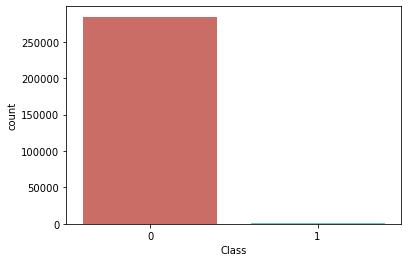

Percentage of fraudulent class: 0.1727485630620034
Percentage of non-fraudulent class: 99.82725143693798


In [7]:
# Value count showing imbalanced data
print(df1['Class'].value_counts())
# Visulaize the imbalance (looks pretty bad)
sns.countplot(x='Class',data=df1, palette='hls')
plt.show()
# Percentage of imbalanced data by class
not_fraud = len(df1[df1['Class']==0])
fraud = len(df1[df1['Class']==1])
pct_of_no_fraud = not_fraud/(not_fraud+fraud)
pct_of_fraud = fraud/(not_fraud+fraud)
print("Percentage of fraudulent class:", pct_of_fraud*100)
print("Percentage of non-fraudulent class:", pct_of_no_fraud *100)

^Our target variable "Class" is very imbalanced. This will be one challange we need to give attention to.

In [8]:
df1.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


At first glance, fraud (indicated by class 1) have more extreme mean values deviating further from zero than non-fraud. (Just an observation)

(-20.0, 5.0)

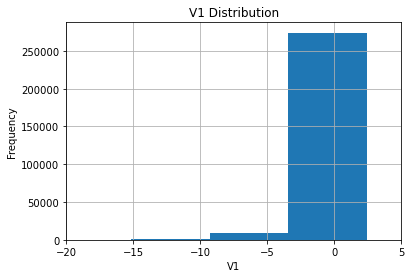

In [9]:
## Show distribution for Continuous variables
df1.V1.hist()
plt.title('V1 Distribution')
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.xlim(-20,5)

(-20.0, 5.0)

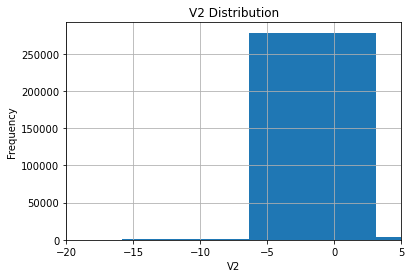

In [10]:
df1.V2.hist()
plt.title('V2 Distribution')
plt.xlabel('V2')
plt.ylabel('Frequency')
plt.xlim(-20,5)

(-20.0, 5.0)

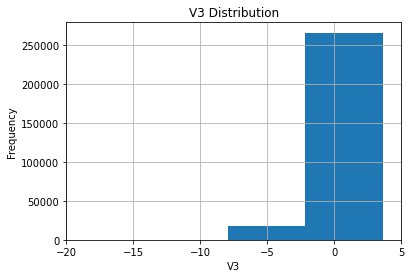

In [11]:
df1.V3.hist()
plt.title('V3 Distribution')
plt.xlabel('V3')
plt.ylabel('Frequency')
plt.xlim(-20,5)

(-20.0, 5.0)

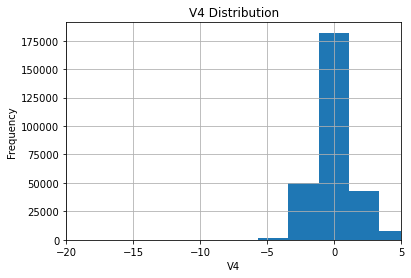

In [12]:
df1.V4.hist()
plt.title('V4 Distribution')
plt.xlabel('V4')
plt.ylabel('Frequency')
plt.xlim(-20,5)

(-10.0, 25.0)

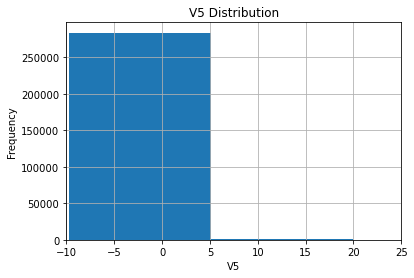

In [13]:
df1.V5.hist()
plt.title('V5 Distribution')
plt.xlabel('V5')
plt.ylabel('Frequency')
plt.xlim(-10,25)

(-10.0, 15.0)

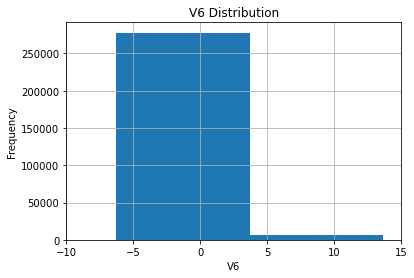

In [14]:
df1.V6.hist()
plt.title('V6 Distribution')
plt.xlabel('V6')
plt.ylabel('Frequency')
plt.xlim(-10,15)

(-15.0, 25.0)

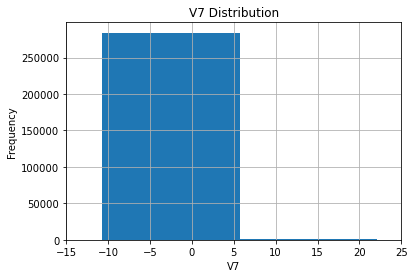

In [15]:
df1.V7.hist()
plt.title('V7 Distribution')
plt.xlabel('V7')
plt.ylabel('Frequency')
plt.xlim(-15,25)

(-20.0, 15.0)

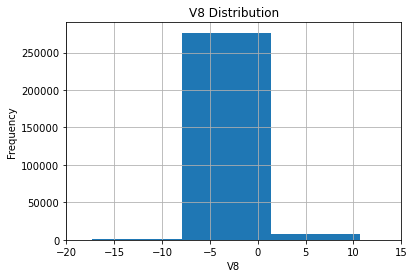

In [16]:
df1.V8.hist()
plt.title('V8 Distribution')
plt.xlabel('V8')
plt.ylabel('Frequency')
plt.xlim(-20,15)

(-10.0, 10.0)

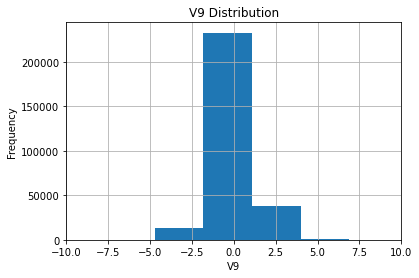

In [17]:
df1.V9.hist()
plt.title('V9 Distribution')
plt.xlabel('V9')
plt.ylabel('Frequency')
plt.xlim(-10,10)

(-10.0, 10.0)

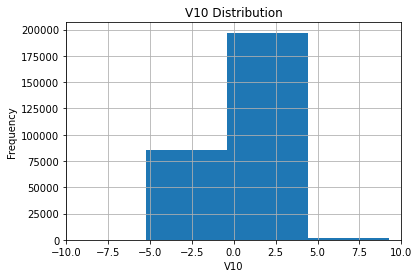

In [18]:
df1.V10.hist()
plt.title('V10 Distribution')
plt.xlabel('V10')
plt.ylabel('Frequency')
plt.xlim(-10,10)

(-5.0, 5.0)

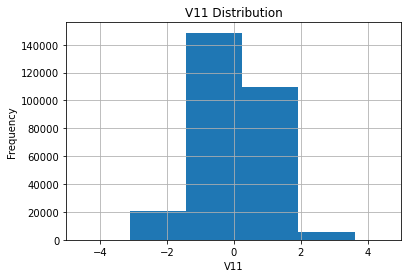

In [19]:
df1.V11.hist()
plt.title('V11 Distribution')
plt.xlabel('V11')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-10.0, 10.0)

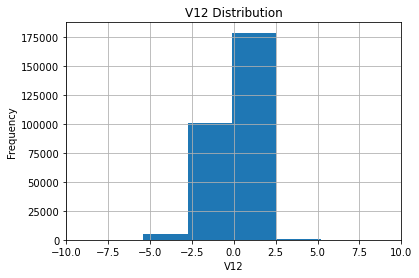

In [20]:
df1.V12.hist()
plt.title('V12 Distribution')
plt.xlabel('V12')
plt.ylabel('Frequency')
plt.xlim(-10,10)

(-5.0, 5.0)

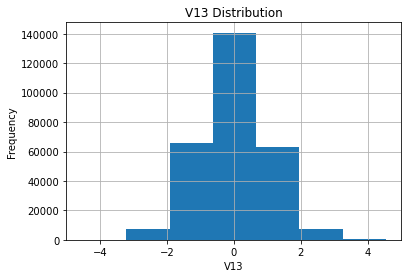

In [21]:
df1.V13.hist()
plt.title('V13 Distribution')
plt.xlabel('V13')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-10.0, 5.0)

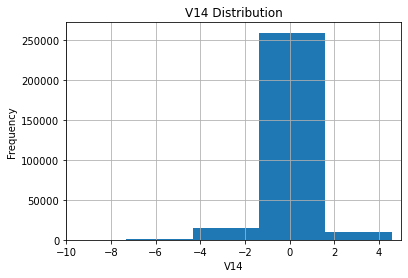

In [22]:
df1.V14.hist()
plt.title('V14 Distribution')
plt.xlabel('V14')
plt.ylabel('Frequency')
plt.xlim(-10,5)

(-5.0, 5.0)

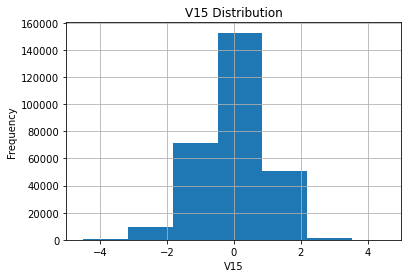

In [23]:
df1.V15.hist()
plt.title('V15 Distribution')
plt.xlabel('V15')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-5.0, 5.0)

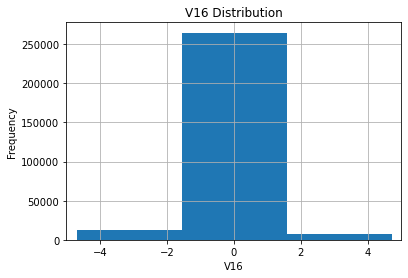

In [24]:
df1.V16.hist()
plt.title('V16 Distribution')
plt.xlabel('V16')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-5.0, 10.0)

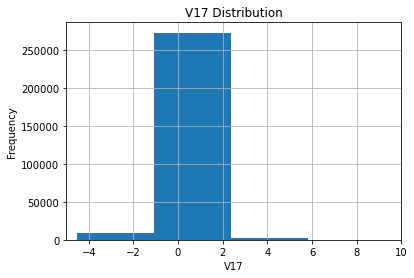

In [25]:
df1.V17.hist()
plt.title('V17 Distribution')
plt.xlabel('V17')
plt.ylabel('Frequency')
plt.xlim(-5,10)

(-5.0, 5.0)

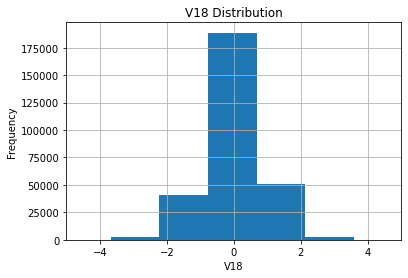

In [26]:
df1.V18.hist()
plt.title('V18 Distribution')
plt.xlabel('V18')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-5.0, 5.0)

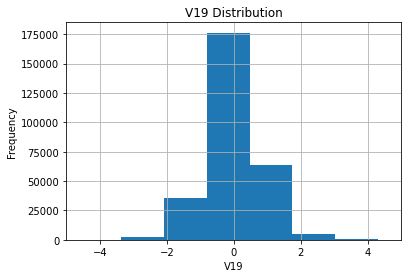

In [27]:
df1.V19.hist()
plt.title('V19 Distribution')
plt.xlabel('V19')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-10.0, 15.0)

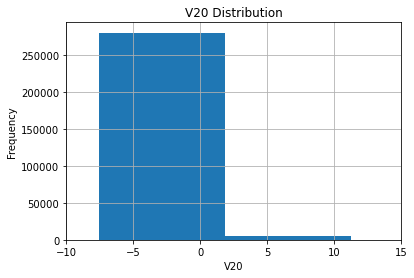

In [28]:
df1.V20.hist()
plt.title('V20 Distribution')
plt.xlabel('V20')
plt.ylabel('Frequency')
plt.xlim(-10,15)

(-10.0, 10.0)

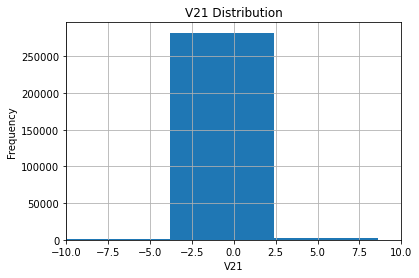

In [29]:
df1.V21.hist()
plt.title('V21 Distribution')
plt.xlabel('V21')
plt.ylabel('Frequency')
plt.xlim(-10,10)

(-5.0, 5.0)

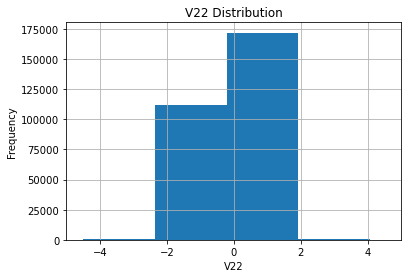

In [30]:
df1.V22.hist()
plt.title('V22 Distribution')
plt.xlabel('V22')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-5.0, 10.0)

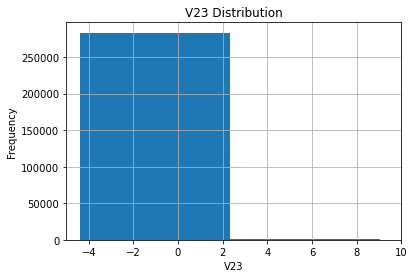

In [31]:
df1.V23.hist()
plt.title('V23 Distribution')
plt.xlabel('V23')
plt.ylabel('Frequency')
plt.xlim(-5,10)

(-5.0, 5.0)

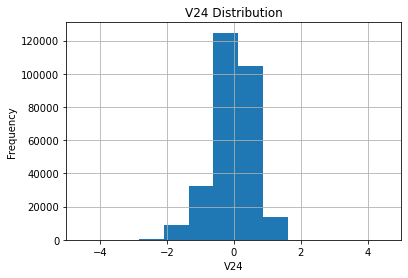

In [32]:
df1.V24.hist()
plt.title('V24 Distribution')
plt.xlabel('V24')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-5.0, 5.0)

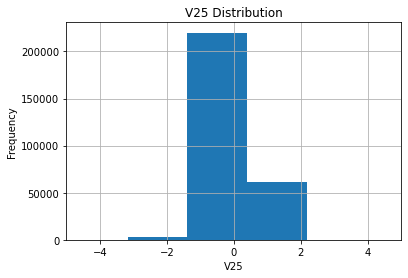

In [33]:
df1.V25.hist()
plt.title('V25 Distribution')
plt.xlabel('V25')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-5.0, 5.0)

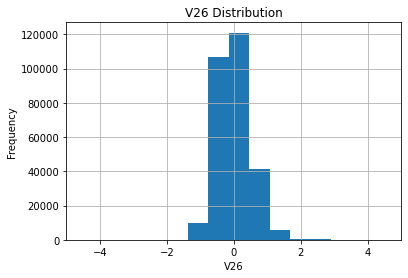

In [34]:
df1.V26.hist()
plt.title('V26 Distribution')
plt.xlabel('V26')
plt.ylabel('Frequency')
plt.xlim(-5,5)

(-10.0, 5.0)

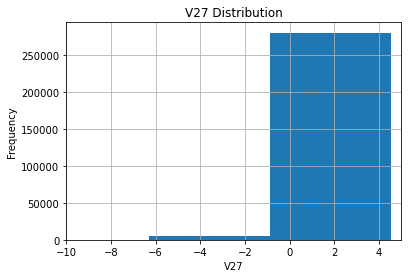

In [35]:
df1.V27.hist()
plt.title('V27 Distribution')
plt.xlabel('V27')
plt.ylabel('Frequency')
plt.xlim(-10,5)

(-10.0, 5.0)

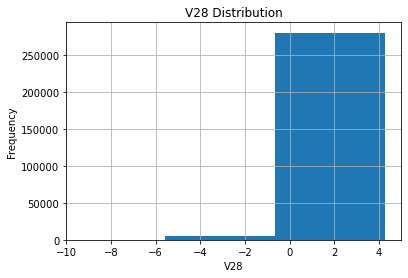

In [36]:
df1.V28.hist()
plt.title('V28 Distribution')
plt.xlabel('V28')
plt.ylabel('Frequency')
plt.xlim(-10,5)

(-100.0, 3000.0)

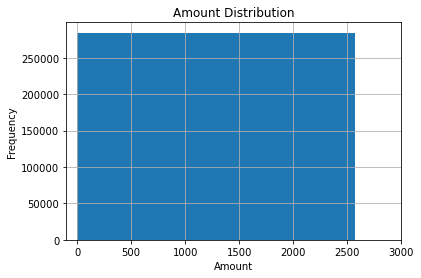

In [44]:
df1.Amount.hist()
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(-100,3000)

For most of our "V" variables, we generally have a normal distribution around zero.

In [38]:
# find variables with highest correlations
corr_matrix = df1.corr()
print(corr_matrix["Class"].sort_values(ascending=False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


No high correlations with our target variable..

In [47]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
nRowsRead = 1000

C:\Users\ajens\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


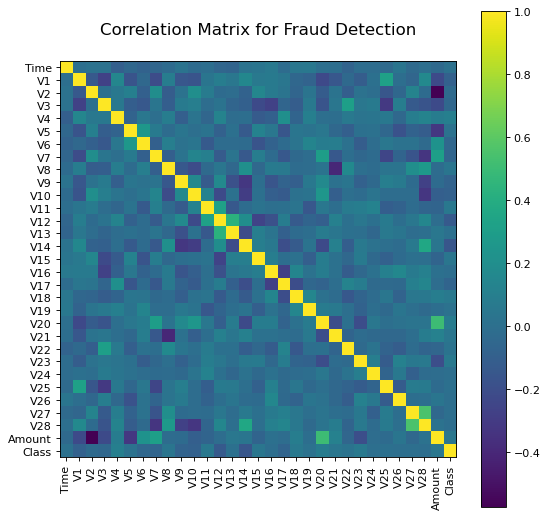

In [48]:
plotCorrelationMatrix(df1, 8)

^This plot shows a visualization supporting the fairly low correlation coefficients